In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parents[1]))
from handle_results import HandleResults

In [25]:
home_folder = Path.cwd().parents[1]
plot_folder = home_folder.joinpath(home_folder, 'Plots', 'Runtime')
plot_folder.mkdir(parents=True, exist_ok=True)
path = home_folder.joinpath(home_folder, 'CSV_results')
df_info = pd.read_csv(path.joinpath('dataset_info.csv'))
df = pd.read_csv(path.joinpath('Cross_validation', 'Cross_validation.csv'), index_col=0)
HR = HandleResults()

# Table

In [93]:
df_table = df.loc[df.proportion==1, ['oversampler','runtime','runtime_std']]
ab = df_table.groupby('oversampler').mean().sort_values('runtime')
print(ab.round(3).to_latex())

\begin{tabular}{lrr}
\toprule
{} &  runtime &  runtime\_std \\
oversampler       &          &              \\
\midrule
RandomOversampler &    0.014 &        0.001 \\
polynom\_fit\_SMOTE &    0.041 &        0.002 \\
SMOTE             &    0.059 &        0.002 \\
BorderlineSMOTE   &    0.297 &        0.005 \\
ADASYN            &    0.397 &        0.006 \\
Random\_SMOTE      &    0.419 &        0.015 \\
SMOTENC           &    1.395 &        0.024 \\
SVMSMOTE          &    2.735 &        0.057 \\
synthsonic        &   86.641 &        0.646 \\
\bottomrule
\end{tabular}



# runtime vs oversampler

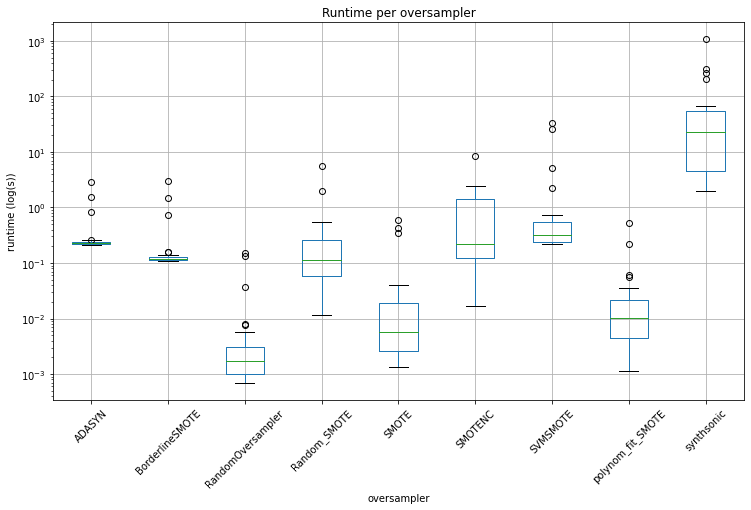

In [26]:
df_oversample_prop_1 = df.loc[(df.proportion==1),:]
boxplot = df_oversample_prop_1.boxplot(by='oversampler'
                                       , column='runtime'
                                       , rot=45
                                       , figsize=(12,7))
plt.suptitle('')
boxplot.set_title('Runtime per oversampler')
plt.ylabel('runtime (log(s))')
plt.yscale('log')
plt.savefig(plot_folder.joinpath('boxplot.svg'))

# Data

In [76]:
df_left = df.loc[df.proportion==1,['dataset','oversampler','runtime']]
df_right = df_info.loc[:,['dataset','size','features']]
df_oversample_prop_1 = df_left.merge(df_right
                                     , how='left'
                                     , on='dataset')

# filter
ordered_by_size = list(df_info.sort_values('size')['dataset'])
ordered_by_features = list(df_info.sort_values('features')['dataset'])

# sorted dfs
runtime_ordered_by_size = df_oversample_prop_1.sort_values('size')
runtime_ordered_by_features = df_oversample_prop_1.sort_values('features')

# oversampler
oversamplers = list(df_oversample_prop_1.oversampler.unique())
oversamplers.remove('SMOTENC')

In [77]:
runtime_ordered_by_features

,dataset,oversampler,runtime,size,features
88,mammography,RandomOversampler,0.002829,11183.0,6.0
93,mammography,synthsonic,2.227567,11183.0,6.0
92,mammography,polynom_fit_SMOTE,0.030792,11183.0,6.0
91,mammography,SVMSMOTE,0.427418,11183.0,6.0
90,mammography,SMOTE,0.005716,11183.0,6.0
...,...,...,...,...,...
66,isolet,SMOTENC,2.457391,7797.0,617.0
65,isolet,SMOTE,0.353257,7797.0,617.0
64,isolet,Random_SMOTE,0.513166,7797.0,617.0
61,isolet,ADASYN,0.816874,7797.0,617.0


# runtime vs size

/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


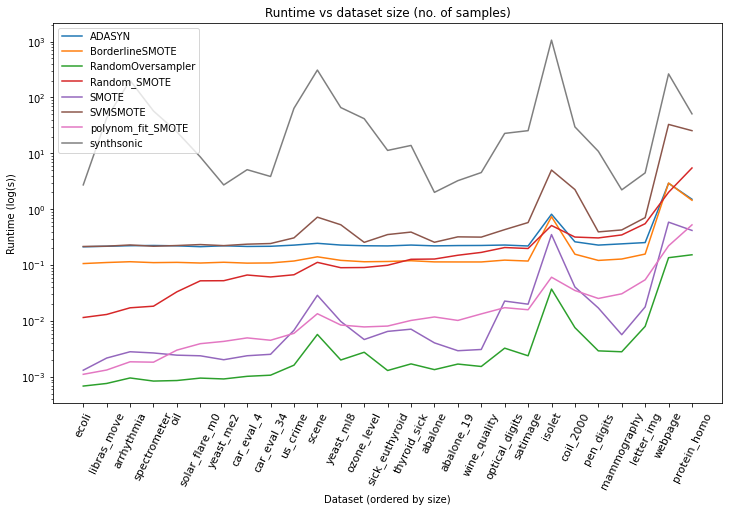

In [80]:
f, ax = plt.subplots(figsize=(12,7))
for o in oversamplers:
    ax.plot(ordered_by_size
            , runtime_ordered_by_size.loc[runtime_ordered_by_size.oversampler==o,'runtime']
            , label=str(o))

ax.set_xticklabels(ordered_by_size
                   , rotation=64
                   , fontsize=11)    

ax.set_yscale('log')
ax.set_title('Runtime vs dataset size (no. of samples)')
ax.set_xlabel('Dataset (ordered by size)')
ax.set_ylabel('Runtime (log(s))')
ax.legend()

f.savefig(plot_folder.joinpath('runtime_vs_size.svg'))

# runtime vs No. of features

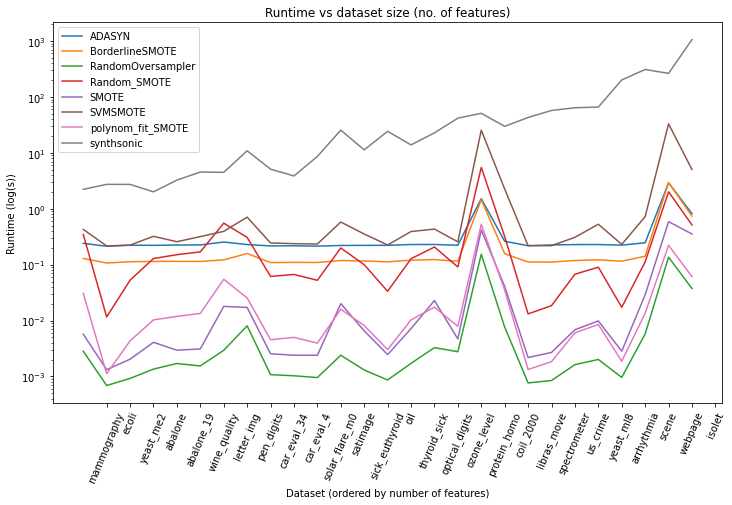

In [82]:
f, ax = plt.subplots(figsize=(12,7))

for o in oversamplers:
    ax.plot(ordered_by_features
            , runtime_ordered_by_features.loc[runtime_ordered_by_features.oversampler==o,'runtime']
            , label=str(o))

ax.set_title('Runtime vs dataset size (no. of features)')
ax.set_xlabel('Dataset (ordered by number of features)')
ax.set_ylabel('Runtime (log(s))')
ax.set_xticks(np.arange(1,28))
ax.set_xticklabels(ordered_by_features
                   , rotation=67)

ax.set_yscale('log')
ax.legend()
f.savefig(plot_folder.joinpath('runtime_vs_features.svg'))

In [87]:
runtime_ordered_by_features[runtime_ordered_by_features.oversampler=='SVMSMOTE']

,dataset,oversampler,runtime,size,features
91,mammography,SVMSMOTE,0.427418,11183.0,6.0
58,ecoli,SVMSMOTE,0.216279,336.0,7.0
216,yeast_me2,SVMSMOTE,0.224006,1484.0,8.0
6,abalone,SVMSMOTE,0.321618,4177.0,10.0
15,abalone_19,SVMSMOTE,0.257308,4177.0,10.0
207,wine_quality,SVMSMOTE,0.318005,4898.0,11.0
124,pen_digits,SVMSMOTE,0.394623,10992.0,16.0
75,letter_img,SVMSMOTE,0.708805,20000.0,16.0
32,car_eval_34,SVMSMOTE,0.244267,1728.0,21.0
40,car_eval_4,SVMSMOTE,0.237878,1728.0,21.0


# runtime vs proportion

In [37]:
df_oversample_prop_1

,dataset,oversampler,proportion,balanced_accuracy,balanced_accuracy_std,G_mean,G_mean_std,f1,f1_std,precision,precision_std,recall,recall_std,pr_auc,pr_auc_std,runtime,runtime_std
0,abalone,ADASYN,1.0,0.600836,0.016706,0.505826,0.035118,0.274076,0.027254,0.270573,0.015837,0.278798,0.038602,0.261602,0.010482,0.221835,0.004014
9,abalone,BorderlineSMOTE,1.0,0.607490,0.012282,0.515067,0.024710,0.288825,0.018143,0.292208,0.009573,0.286556,0.029185,0.267912,0.010755,0.114335,0.002462
15,abalone,RandomOversampler,1.0,0.632556,0.028732,0.565563,0.046238,0.319236,0.044259,0.291912,0.035980,0.353066,0.057438,0.277861,0.015026,0.001356,0.000008
17,abalone,Random_SMOTE,1.0,0.605619,0.017545,0.503926,0.031793,0.292915,0.033975,0.320157,0.039602,0.271197,0.033548,0.281009,0.033697,0.128999,0.012304
25,abalone,SMOTE,1.0,0.605644,0.017083,0.512038,0.032571,0.285259,0.030446,0.287510,0.028387,0.283926,0.035187,0.271035,0.005111,0.004083,0.000249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,yeast_ml8,Random_SMOTE,1.0,0.504549,0.009855,0.178819,0.104895,0.057212,0.033678,0.083036,0.048798,0.044823,0.027532,0.098797,0.013958,0.090222,0.007523
1146,yeast_ml8,SMOTE,1.0,0.498359,0.010893,0.182883,0.061556,0.047430,0.029701,0.063928,0.028988,0.039141,0.028722,0.087218,0.001970,0.009858,0.000316
1151,yeast_ml8,SVMSMOTE,1.0,0.513287,0.017498,0.176052,0.115863,0.068284,0.055051,0.139423,0.118302,0.045328,0.036015,0.102666,0.008585,0.529174,0.003417
1152,yeast_ml8,polynom_fit_SMOTE,1.0,0.511562,0.018506,0.157483,0.117790,0.057353,0.057872,0.139881,0.107267,0.039646,0.043693,0.104006,0.013414,0.008505,0.000465
